In [97]:
import pandas as pd

In [98]:

df_mobilite = pd.read_csv("data/RP2021_mobpro/FD_MOBPRO_2021.csv", sep=';')


colonne_a_garder = [
    'COMMUNE', # Département et commune du lieu de résidence
    'DCLT', # Département, commune et arrondissement municipal (Paris, Lyon, Marseille) du lieu de travail
    'TRANS', # Mode de transport principal le plus souvent utilisé pour aller travailler
    'AGEREVQ', # Âge quinquennal en années révolues
    'IPONDI', # Poids de l'individu
    'ILTUU' # Indicateur urbain du lieu de travail
    ]

df_mobilite = df_mobilite[colonne_a_garder]
df_mobilite_filtre = df_mobilite.set_index('COMMUNE')
df_mobilite_filtre.loc[1001:1004].to_csv("data/RP2021_mobpro/Commune_1001-1004.csv")
# df_mobilite_filtre



df_nom_commune = pd.read_csv("data/RP2021_mobpro/varmod_mobpro_2021.csv", sep=';')

colonne_a_garder_commune = ['COD_VAR', 'COD_MOD', 'LIB_MOD']
df_nom_commune_filtre = df_nom_commune[colonne_a_garder_commune]
# df_nom_commune_filtre = df_nom_commune.set_index('COD_VAR')

df_nom_commune_filtre








/var/folders/xs/jrs1y89110jbdw4ctm6lbc4c0000gn/T/ipykernel_1479/4215257865.py:1: DtypeWarning: Columns (0,1,2,3,13,14,15,17,21,23,26,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mobilite = pd.read_csv("data/RP2021_mobpro/FD_MOBPRO_2021.csv", sep=';')


,COD_VAR,COD_MOD,LIB_MOD
0,COMMUNE,01001,L'Abergement-Clémenciat (01001)
1,COMMUNE,01002,L'Abergement-de-Varey (01002)
2,COMMUNE,01004,Ambérieu-en-Bugey (01004)
3,COMMUNE,01005,Ambérieux-en-Dombes (01005)
4,COMMUNE,01006,Ambléon (01006)
...,...,...,...
70791,VOIT,0,Aucune voiture
70792,VOIT,1,Une seule voiture
70793,VOIT,2,Deux voitures
70794,VOIT,3,Trois voitures ou plus


In [99]:
df_mobilite_commune_1001_1004 = pd.read_csv("data/RP2021_mobpro/Commune_1001-1004.csv")

# print(df_mobilite_commune_1001_1004)


# Nettoyage et préparation des données

# Suppression des enregistrementsdoublons
presence_de_doublons = df_mobilite_commune_1001_1004.duplicated().sum()

if presence_de_doublons > 0:
    print("Suppression des doublons")
    df_mobilite_commune_1001_1004 = df_mobilite_commune_1001_1004.drop_duplicates()
else:
    print("Aucun doublon détecté")

# Suppression des enregistrements ayant des valeurs manquantes par colonne
nombre_de_valeurs_manquantes = df_mobilite_commune_1001_1004.isna().sum()

if nombre_de_valeurs_manquantes.sum() > 0:
    print("Suppression des enregistrements ayant des valeurs manquantes par colonne")
    df_mobilite_commune_1001_1004 = df_mobilite_commune_1001_1004.dropna()
else:
    print("Aucune valeur manquante détectée")

# Arrondi du poids de l'individu

df_mobilite_commune_1001_1004['IPONDI'] = df_mobilite_commune_1001_1004['IPONDI'].round(2)

df_mobilite_commune_1001_1004.loc[df_mobilite_commune_1001_1004['COMMUNE'].astype(str).str.len() == 4, 'COMMUNE'] = '0' + df_mobilite_commune_1001_1004['COMMUNE'].astype(str)

df_mobilite_commune_1001_1004.loc[df_mobilite_commune_1001_1004['DCLT'].astype(str).str.len() == 4, 'DCLT'] = '0' + df_mobilite_commune_1001_1004['DCLT'].astype(str)

df_mobilite_commune_1001_1004



Suppression des doublons
Aucune valeur manquante détectée


/var/folders/xs/jrs1y89110jbdw4ctm6lbc4c0000gn/T/ipykernel_1479/3837209508.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['01001' '01001' '01001' ... '01004' '01004' '01004']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_mobilite_commune_1001_1004.loc[df_mobilite_commune_1001_1004['COMMUNE'].astype(str).str.len() == 4, 'COMMUNE'] = '0' + df_mobilite_commune_1001_1004['COMMUNE'].astype(str)
/var/folders/xs/jrs1y89110jbdw4ctm6lbc4c0000gn/T/ipykernel_1479/3837209508.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['01001' '01001' '01001' ... '01451' '06152' '07308']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_mobilite_commune_1001_1004.loc[df_mobilite_commune_1001_1004['DCLT'].astype(str).str.len() == 4, 'DCLT'] = '0' +

,COMMUNE,DCLT,TRANS,AGEREVQ,IPONDI,ILTUU
0,01001,01001,5,55,4.84,1
1,01001,01001,1,25,4.89,1
2,01001,01001,5,35,4.84,1
3,01001,01001,5,45,4.76,1
4,01001,01001,1,20,4.89,1
...,...,...,...,...,...,...
2144,01004,92050,6,50,1.24,5
2145,01004,94054,5,35,3.59,5
2146,01004,97602,5,20,4.12,5
2147,01004,99999,6,40,3.62,5


In [100]:
# Nettoyage et préparation des données

# Suppression des enregistrementsdoublons

presence_de_doublons = df_nom_commune_filtre.duplicated().sum()

print(presence_de_doublons)
if presence_de_doublons > 0:
    print("Suppression des doublons")
    df_nom_commune_filtre = df_nom_commune_filtre.drop_duplicates()
else:
    print("Aucun doublon détecté")


# Suppression des enregistrements ayant des valeurs manquantes par colonne
nombre_de_valeurs_manquantes = df_nom_commune_filtre.isna().sum()

print(nombre_de_valeurs_manquantes.sum())
if nombre_de_valeurs_manquantes.sum() > 0:
    print("Suppression des enregistrements ayant des valeurs manquantes par colonne")
    df_nom_commune_filtre = df_nom_commune_filtre.dropna()
else:
    print("Aucune valeur manquante détectée")

df_nom_commune_filtre


0
Aucun doublon détecté
2
Suppression des enregistrements ayant des valeurs manquantes par colonne


,COD_VAR,COD_MOD,LIB_MOD
0,COMMUNE,01001,L'Abergement-Clémenciat (01001)
1,COMMUNE,01002,L'Abergement-de-Varey (01002)
2,COMMUNE,01004,Ambérieu-en-Bugey (01004)
3,COMMUNE,01005,Ambérieux-en-Dombes (01005)
4,COMMUNE,01006,Ambléon (01006)
...,...,...,...
70791,VOIT,0,Aucune voiture
70792,VOIT,1,Une seule voiture
70793,VOIT,2,Deux voitures
70794,VOIT,3,Trois voitures ou plus


In [101]:
df_nom_commune_filtre

,COD_VAR,COD_MOD,LIB_MOD
0,COMMUNE,01001,L'Abergement-Clémenciat (01001)
1,COMMUNE,01002,L'Abergement-de-Varey (01002)
2,COMMUNE,01004,Ambérieu-en-Bugey (01004)
3,COMMUNE,01005,Ambérieux-en-Dombes (01005)
4,COMMUNE,01006,Ambléon (01006)
...,...,...,...
70791,VOIT,0,Aucune voiture
70792,VOIT,1,Une seule voiture
70793,VOIT,2,Deux voitures
70794,VOIT,3,Trois voitures ou plus


In [102]:
df_nom_commune_filtre[df_nom_commune_filtre['COD_VAR'] == "TRANS"][df_nom_commune_filtre['COD_MOD'] == "5"]["LIB_MOD"]

/var/folders/xs/jrs1y89110jbdw4ctm6lbc4c0000gn/T/ipykernel_1479/2495942348.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_nom_commune_filtre[df_nom_commune_filtre['COD_VAR'] == "TRANS"][df_nom_commune_filtre['COD_MOD'] == "5"]["LIB_MOD"]


70772    Voiture, camion, fourgonnette
Name: LIB_MOD, dtype: object

In [103]:

# df_mobilite_commune_1001_1004

test = df_mobilite_commune_1001_1004.copy()
test

# test['COMMUNE'] = df_nom_commune_filtre[df_nom_commune_filtre['COD_VAR'] == "COMMUNE"][df_nom_commune_filtre['COD_MOD'] == "01001"]["LIB_MOD"]
# test

commune_mapping = df_nom_commune_filtre[df_nom_commune_filtre['COD_VAR'] == 'COMMUNE'].set_index('COD_MOD')['LIB_MOD']
df_mobilite_commune_1001_1004['COMMUNE'] = df_mobilite_commune_1001_1004['COMMUNE'].astype(str).str.zfill(5).map(commune_mapping)

DCLT_mapping = df_nom_commune_filtre[df_nom_commune_filtre['COD_VAR'] == 'DCLT'].set_index('COD_MOD')['LIB_MOD']
df_mobilite_commune_1001_1004['DCLT'] = df_mobilite_commune_1001_1004['DCLT'].astype(str).str.zfill(5).map(DCLT_mapping)

TRANS_mapping = df_nom_commune_filtre[df_nom_commune_filtre['COD_VAR'] == 'TRANS'].set_index('COD_MOD')['LIB_MOD']
df_mobilite_commune_1001_1004['TRANS'] = df_mobilite_commune_1001_1004['TRANS'].astype(str).str.zfill(1).map(TRANS_mapping)

AGEREVQ_mapping = df_nom_commune_filtre[df_nom_commune_filtre['COD_VAR'] == 'AGEREVQ'].set_index('COD_MOD')['LIB_MOD']
df_mobilite_commune_1001_1004['AGEREVQ'] = df_mobilite_commune_1001_1004['AGEREVQ'].astype(str).str.zfill(3).map(AGEREVQ_mapping)

ILTUU_mapping = df_nom_commune_filtre[df_nom_commune_filtre['COD_VAR'] == 'ILTUU'].set_index('COD_MOD')['LIB_MOD']
df_mobilite_commune_1001_1004['ILTUU'] = df_mobilite_commune_1001_1004['ILTUU'].astype(str).str.zfill(1).map(ILTUU_mapping)

df_mobilite_commune_1001_1004.to_csv("data/RP2021_mobpro/Commune_1001-1004_2.csv")

df_mobilite_commune_1001_1004

# df_mobilite_commune_1001_1004 = df_mobilite_commune_1001_1004.merge(df_nom_commune_filtre, left_on='COMMUNE', right_on='COD_MOD')
# df_mobilite_commune_1001_1004.drop(columns=['COD_MOD', 'COMMUNE'], inplace=True)
# df_mobilite_commune_1001_1004.rename(columns={'LIB_MOD': 'COMMUNE'}, inplace=True)

# df_commune = df_nom_commune_filtre[df_nom_commune_filtre['COD_VAR'] == 'COMMUNE'].set_index('COD_MOD')
# df_DCLT    = df_nom_commune_filtre[df_nom_commune_filtre['COD_VAR'] == 'DCLT'].set_index('COD_MOD')
# df_TRANS   = df_nom_commune_filtre[df_nom_commune_filtre['COD_VAR'] == 'TRANS'].set_index('COD_MOD')
# df_AGEREVQ = df_nom_commune_filtre[df_nom_commune_filtre['COD_VAR'] == 'AGEREVQ'].set_index('COD_MOD')
# df_IPONDI  = df_nom_commune_filtre[df_nom_commune_filtre['COD_VAR'] == 'IPONDI'].set_index('COD_MOD')
# df_ILTUU   = df_nom_commune_filtre[df_nom_commune_filtre['COD_VAR'] == 'ILTUU'].set_index('COD_MOD')

# for index, row in df_mobilite_commune_1001_1004.iterrows():
#     if len(str(int(row['COMMUNE']))) == 4:
#         row['COMMUNE'] = '0' + str(int(row['COMMUNE']))
#         row['DCLT'] = '0' + str(int(row['DCLT']))
#     else:
#         row['COMMUNE'] = str(int(row['COMMUNE']))
#         row['DCLT'] = '0' + str(int(row['DCLT']))

#     row['COMMUNE'] = df_commune.loc[row['COMMUNE']]['LIB_MOD']
#     row['DCLT']    = df_DCLT.loc[row['DCLT']]['LIB_MOD']
#     row['TRANS']   = df_TRANS.loc[str(int(row['TRANS']))]['LIB_MOD']
#     print(row['AGEREVQ'])
#     # row['AGEREVQ'] = df_AGEREVQ.loc[str(int(row['AGEREVQ']))]['LIB_MOD']
#     # row['IPONDI']  = df_IPONDI.loc[row['IPONDI']]['LIB_MOD']
#     # row['ILTUU']   = df_ILTUU.loc[row['ILTUU']]['LIB_MOD']

    
#     print(f"Index: {index}, Row Data: {row}"


,COMMUNE,DCLT,TRANS,AGEREVQ,IPONDI,ILTUU
0,L'Abergement-Clémenciat (01001),L'Abergement-Clémenciat (01001),"Voiture, camion, fourgonnette",55 à 59 ans,4.84,Réside dans une commune rurale et travaille da...
1,L'Abergement-Clémenciat (01001),L'Abergement-Clémenciat (01001),Pas de transport,25 à 29 ans,4.89,Réside dans une commune rurale et travaille da...
2,L'Abergement-Clémenciat (01001),L'Abergement-Clémenciat (01001),"Voiture, camion, fourgonnette",35 à 39 ans,4.84,Réside dans une commune rurale et travaille da...
3,L'Abergement-Clémenciat (01001),L'Abergement-Clémenciat (01001),"Voiture, camion, fourgonnette",45 à 49 ans,4.76,Réside dans une commune rurale et travaille da...
4,L'Abergement-Clémenciat (01001),L'Abergement-Clémenciat (01001),Pas de transport,20 à 24 ans,4.89,Réside dans une commune rurale et travaille da...
...,...,...,...,...,...,...
2144,Ambérieu-en-Bugey (01004),Nanterre (92050),Transports en commun,50 à 54 ans,1.24,Réside dans une commune urbaine et travaille e...
2145,Ambérieu-en-Bugey (01004),Orly (94054),"Voiture, camion, fourgonnette",35 à 39 ans,3.59,Réside dans une commune urbaine et travaille e...
2146,Ambérieu-en-Bugey (01004),Bandraboua (97602),"Voiture, camion, fourgonnette",20 à 24 ans,4.12,Réside dans une commune urbaine et travaille e...
2147,Ambérieu-en-Bugey (01004),Individu travaillant à l'étranger (99999),Transports en commun,40 à 44 ans,3.62,Réside dans une commune urbaine et travaille e...


In [104]:
# Pourcentage de population sans accès direct à un transport:

# Calcul de la population global:
population_total = df_mobilite_commune_1001_1004['IPONDI'].sum()

print(f"Population total: {population_total}")

# Calcul de la population sans accès direct à un transport:
population_sans_transport = df_mobilite_commune_1001_1004[df_mobilite_commune_1001_1004['TRANS'] == "Pas de transport"]['IPONDI'].sum()

print(f"Population sans transport: {population_sans_transport}")

# Calcul de la population sans accès direct à un transport, en pourcentage:
pourcentage_population_sans_transport = (population_sans_transport / population_total) * 100

print(f"Pourcentage de population sans transport: {pourcentage_population_sans_transport:.2f}%")




# Population sans transport par commune:

df = df_mobilite_commune_1001_1004 
df['sans_transport'] = df['IPONDI'].where(df['TRANS'] == 'Pas de transport', 0)

df = df.groupby('COMMUNE').agg(
    total_hab=('IPONDI', 'sum'),
    sans_transport=('sans_transport', 'sum')
).reset_index()

df



Population total: 4845.82
Population sans transport: 240.86
Pourcentage de population sans transport: 4.97%


,COMMUNE,total_hab,sans_transport
0,Ambérieu-en-Bugey (01004),4365.09,216.65
1,L'Abergement-Clémenciat (01001),378.14,19.47
2,L'Abergement-de-Varey (01002),102.59,4.74


In [105]:
# Calcul de temps moyen domicle - travail:

vitesses = {
    'Pas de transport': 0,
    'Marche à pied (ou rollers, patinette)': 5,
    'Vélo (y compris à assistance électrique)': 15,
    'Deux-roues motorisé': 40,
    'Voiture, camion, fourgonnette': 50,
    'Transports en commun': 30
}

def estimation_temps_moyen(commune, dclt, transport):
        if commune == dclt:
            return vitesses[transport]
        elif commune[0:2] == dclt[0:2]:
            return 1.5 * vitesses[transport]
        else:
            return 2 * vitesses[transport]


# df_COMMUNE_temp = df_mobilite_commune_1001_1004['COMMUNE'].str.extract(r'\((.*?)\)')
# df_COMMUNE_temp

# df_DCLT_temp = df_mobilite_commune_1001_1004['DCLT'].str.extract(r'\((.*?)\)')
# df_DCLT_temp

# df_moyen_transport = df_mobilite_commune_1001_1004['TRANS']
# df_moyen_transport

# for i in range(len(df_COMMUNE_temp)):
#     estimation_temps_moyen(df_COMMUNE_temp[i], df_DCLT_temp[i], df_moyen_transport[i])

codes_commune = df_mobilite_commune_1001_1004['COMMUNE'].str.extract(r'\((.*?)\)', expand=False)
codes_dclt = df_mobilite_commune_1001_1004['DCLT'].str.extract(r'\((.*?)\)', expand=False)
transports = df_mobilite_commune_1001_1004['TRANS']

temps_calcules = []

for i in range(len(codes_commune)):
    c = str(codes_commune.iloc[i])
    d = str(codes_dclt.iloc[i])
    t = transports.iloc[i]
    
    resultat = estimation_temps_moyen(c, d, t)
    temps_calcules.append(resultat)

df_mobilite_commune_1001_1004['temps_estime'] = temps_calcules

df_mobilite_commune_1001_1004


,COMMUNE,DCLT,TRANS,AGEREVQ,IPONDI,ILTUU,sans_transport,temps_estime
0,L'Abergement-Clémenciat (01001),L'Abergement-Clémenciat (01001),"Voiture, camion, fourgonnette",55 à 59 ans,4.84,Réside dans une commune rurale et travaille da...,0.00,50.0
1,L'Abergement-Clémenciat (01001),L'Abergement-Clémenciat (01001),Pas de transport,25 à 29 ans,4.89,Réside dans une commune rurale et travaille da...,4.89,0.0
2,L'Abergement-Clémenciat (01001),L'Abergement-Clémenciat (01001),"Voiture, camion, fourgonnette",35 à 39 ans,4.84,Réside dans une commune rurale et travaille da...,0.00,50.0
3,L'Abergement-Clémenciat (01001),L'Abergement-Clémenciat (01001),"Voiture, camion, fourgonnette",45 à 49 ans,4.76,Réside dans une commune rurale et travaille da...,0.00,50.0
4,L'Abergement-Clémenciat (01001),L'Abergement-Clémenciat (01001),Pas de transport,20 à 24 ans,4.89,Réside dans une commune rurale et travaille da...,4.89,0.0
...,...,...,...,...,...,...,...,...
2144,Ambérieu-en-Bugey (01004),Nanterre (92050),Transports en commun,50 à 54 ans,1.24,Réside dans une commune urbaine et travaille e...,0.00,60.0
2145,Ambérieu-en-Bugey (01004),Orly (94054),"Voiture, camion, fourgonnette",35 à 39 ans,3.59,Réside dans une commune urbaine et travaille e...,0.00,100.0
2146,Ambérieu-en-Bugey (01004),Bandraboua (97602),"Voiture, camion, fourgonnette",20 à 24 ans,4.12,Réside dans une commune urbaine et travaille e...,0.00,100.0
2147,Ambérieu-en-Bugey (01004),Individu travaillant à l'étranger (99999),Transports en commun,40 à 44 ans,3.62,Réside dans une commune urbaine et travaille e...,0.00,60.0


In [106]:
# Calculer le taux d'utilisation du vélo

#Population globale:
pop_total = df_mobilite_commune_1001_1004['IPONDI'].sum()

# Population utilisant un vélo:
pop_velo = df_mobilite_commune_1001_1004[df_mobilite_commune_1001_1004['TRANS'] == 'Vélo (y compris à assistance électrique)']['IPONDI'].sum()

# Pourcentage de la population utilisant un vélo:
taux_velo = (pop_velo / pop_total) * 100

print(f"Le taux d'utilisation du vélo est de {taux_velo:.2f}%")


# Calculer le taux d'utilisation des transports en commun

# Population utilisant les transports en commun:
pop_transport_commun = df_mobilite_commune_1001_1004[df_mobilite_commune_1001_1004['TRANS']== 'Transports en commun']['IPONDI'].sum()

# Pourcentage de la population utilisant les transports en commun:
taux_transport_commun = (pop_transport_commun / pop_total) * 100

print(f"Le taux d'utilisation des transports en commun est de {taux_transport_commun:.2f}%")


df2 = df_mobilite_commune_1001_1004 
df2['utilisation_velo'] = df2['IPONDI'].where(df2['TRANS'] == 'Vélo (y compris à assistance électrique)', 0)
df2['utilisation_transport_commun'] = df2['IPONDI'].where(df2['TRANS'] == 'Transports en commun', 0)

df2 = df2.groupby('COMMUNE').agg(
    total_hab=('IPONDI', 'sum'),
    utilisation_velo=('utilisation_velo', 'sum'),
    utilisation_transport_commun=('utilisation_transport_commun', 'sum')
).reset_index()

df2

Le taux d'utilisation du vélo est de 2.43%
Le taux d'utilisation des transports en commun est de 15.43%


,COMMUNE,total_hab,utilisation_velo,utilisation_transport_commun
0,Ambérieu-en-Bugey (01004),4365.09,117.6,738.52
1,L'Abergement-Clémenciat (01001),378.14,0.0,4.80
2,L'Abergement-de-Varey (01002),102.59,0.0,4.60


In [107]:
# Map localisation des communes

coord = 'data/LocalisationCommune.parquet'

df_coord = pd.read_parquet(
    coord, 
    engine='fastparquet',
    columns=['plg_code_commune', 'y_latitude', 'x_longitude']
)

df_coord = df_coord.drop_duplicates(subset=['plg_code_commune'])
df_mobilite_commune_1001_1004['code_commune'] = df_mobilite_commune_1001_1004['COMMUNE'].str.extract(r'\((\d+)\)')[0].astype(str)
df_coord['plg_code_commune'] = df_coord['plg_code_commune'].astype(str)

df_map = pd.merge(
    df_mobilite_commune_1001_1004,
    df_coord,
    left_on='code_commune',
    right_on='plg_code_commune',
    how='left'
)

# print(df_map)

map = folium.Map(location=[df_map['y_latitude'].mean(), df_map['x_longitude'].mean()], zoom_start=10)

for _, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['y_latitude'], row['x_longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(map)

map.save('map.html')


In [108]:
# Map mise en évidence des zones mal desservies
df_sans_transports = df
df_sans_transports['code_commune'] = df_sans_transports['COMMUNE'].str.extract(r'\((\d+)\)')[0].astype(str)
df_sans_transports['pourcentage_sans_transport'] = (df_sans_transports['sans_transport'] / df_sans_transports['total_hab']) * 100

# df_sans_transports 

df_map2 = pd.merge(
    df_sans_transports,
    df_coord,
    left_on='code_commune',
    right_on='plg_code_commune',
    how='left'
)

df_map2

map = folium.Map(location=[df_map2['y_latitude'].mean(), df_map2['x_longitude'].mean()], zoom_start=10)


# Création de la carte
# Si le pourcentage de sans transport est supérieur à 5, le cercle est rouge, sinon vert


for _, row in df_map2.iterrows():
    if row['pourcentage_sans_transport'] > 5:
        folium.CircleMarker(
            location=[row['y_latitude'], row['x_longitude']],
            radius=7,
            color='red',
            fill=False,
            # fill_color='red',
            fill_opacity=0.5
        ).add_to(map)
    else:
        folium.CircleMarker(
            location=[row['y_latitude'], row['x_longitude']],
            radius=5,
            color='green',
            fill=False,
            # fill_color='red',
            fill_opacity=0.5
        ).add_to(map)

map.save('map2.html')


In [109]:
# Map indicateur de mobilité verte
df_mobilite_verte = df2

df_mobilite_verte['code_commune'] = df_mobilite_verte['COMMUNE'].str.extract(r'\((\d+)\)')[0].astype(str)
df_mobilite_verte['pourcentage_velo'] = (df_mobilite_verte['utilisation_velo'] / df_mobilite_verte['total_hab']) * 100
df_mobilite_verte['pourcentage_transport_commun'] = (df_mobilite_verte['utilisation_transport_commun'] / df_mobilite_verte['total_hab']) * 100

# df_mobilite_verte 

df_map3 = pd.merge(
    df_mobilite_verte,
    df_coord,
    left_on='code_commune',
    right_on='plg_code_commune',
    how='left'
)

df_map3

map = folium.Map(location=[df_map3['y_latitude'].mean(), df_map3['x_longitude'].mean()], zoom_start=10)


# Création de la carte
# Si le pourcentage de velo et de transport commun est superieur a 5, le cercle est vert
# Si le pourcentage de velo et de transport commun est inferieur a 5, le cercle est rouge
# Si le pourcentage de velo et de transport commun est superieur a 5 et inferieur a 5, le cercle est jaune

# Taille des cercle variable en fonction du pourcentage de velo et de transport commun

for _, row in df_map3.iterrows():
    print(f"pourcentage velo: {row['pourcentage_velo']}")
    print(f"pourcentage transport commun: {row['pourcentage_transport_commun']}")
    if row['pourcentage_velo'] > 5 and row['pourcentage_transport_commun'] > 5:
        folium.CircleMarker(
            location=[row['y_latitude'], row['x_longitude']],
            radius=row['pourcentage_velo'] + row['pourcentage_transport_commun'],
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.5
        ).add_to(map)
    elif row['pourcentage_velo'] < 5 and row['pourcentage_transport_commun'] < 5:
        folium.CircleMarker(
            location=[row['y_latitude'], row['x_longitude']],
            radius=row['pourcentage_velo'] + row['pourcentage_transport_commun'],
            color='red',
            fill=False,
            fill_color='red',
            fill_opacity=0.5
        ).add_to(map)
    else:
        folium.CircleMarker(
            location=[row['y_latitude'], row['x_longitude']],
            radius=row['pourcentage_velo'] + row['pourcentage_transport_commun'],
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.5
        ).add_to(map)
        

map.save('map3.html')


pourcentage velo: 2.6941025270956613
pourcentage transport commun: 16.918780597879998
pourcentage velo: 0.0
pourcentage transport commun: 1.2693711323848311
pourcentage velo: 0.0
pourcentage transport commun: 4.483867823374597


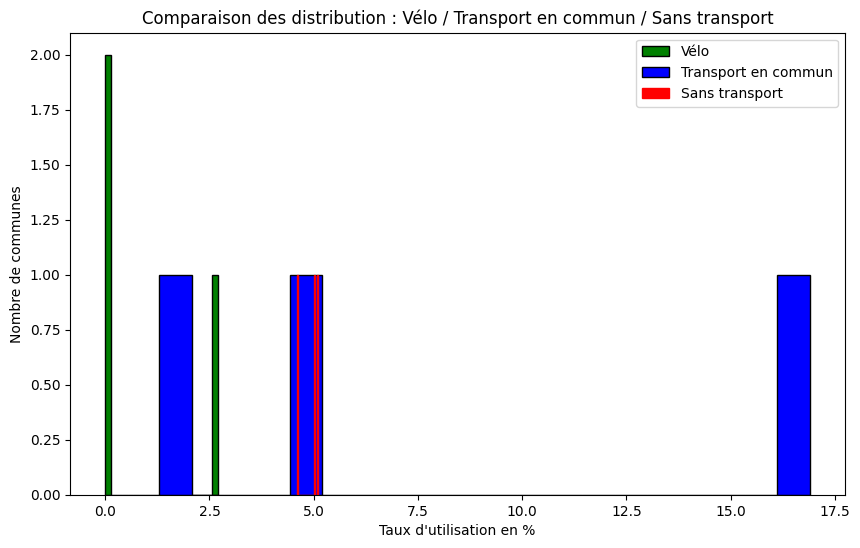

In [110]:
import matplotlib.pyplot as plt

# Graphiques - Histogrammes

# Histogramme utilisations vélos selon le nombre de communes

# plt.figure(figsize=(10, 6))
# plt.hist(df2['pourcentage_velo'].round(1), bins=20, color='blue', edgecolor='black')

# plt.title('Utilisations de vélos selon le nombre de communes (en %)')
# plt.xlabel('Pourcentage')
# plt.ylabel('Nombre de communes')
# plt.show()

# Histogramme utilisations transport en commmun selon le nombre de communes

# plt.figure(figsize=(10, 6))
# plt.hist(df2['pourcentage_transport_commun'].round(1), bins=20, color='blue', edgecolor='black')

# plt.title('Utilisations de transport en commun selon le nombre de communes (en %)')
# plt.xlabel('Pourcentage')
# plt.ylabel('Nombre de communes')
# plt.show()

# Histogramme comparatif : Vélo / Transport en commun / Sans transport

plt.figure(figsize=(10, 6))
plt.hist(df2['pourcentage_velo'].round(1), bins=20, color='green', edgecolor='black')
plt.hist(df2['pourcentage_transport_commun'].round(1), bins=20, color='blue', edgecolor='black')
plt.hist(df['pourcentage_sans_transport'].round(1), bins=20, color='red', edgecolor='red')

plt.legend(['Vélo', 'Transport en commun', 'Sans transport'])

plt.title('Comparaison des distribution : Vélo / Transport en commun / Sans transport')
plt.xlabel('Taux d\'utilisation en %')
plt.ylabel('Nombre de communes')
plt.show()




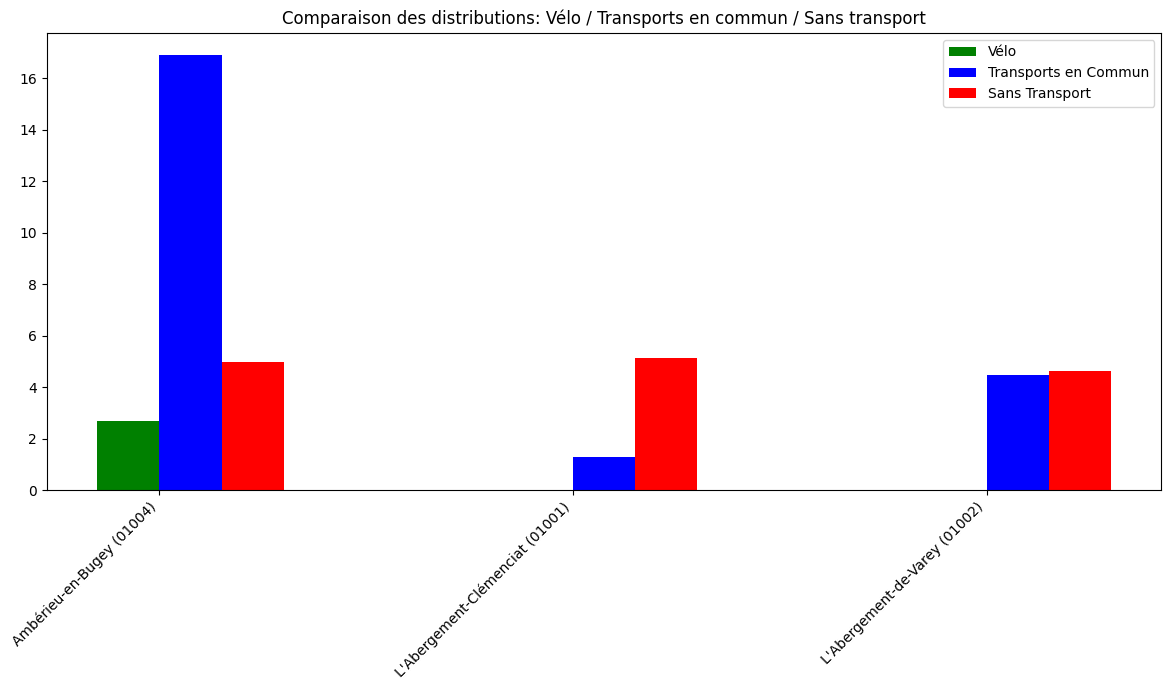

In [111]:
# Création graphiques Bar Charts pour comparaison des distribution: Vélo / Transports en commun / Sans transport

import numpy as np

df2 ['pourcentage_sans_transport'] = df['pourcentage_sans_transport']
x = np.arange(len(df2['COMMUNE'])) 
width = 0.15  

fig, ax = plt.subplots(figsize=(12, 7))

ax.bar(x - width/2, df2['pourcentage_velo'], width, label='Vélo', color='green')
ax.bar(x + width/2, df2['pourcentage_transport_commun'], width, label='Transports en Commun', color='blue')
ax.bar(x + (width/2) * 3, df2['pourcentage_sans_transport'], width, label='Sans Transport', color='red')


ax.set_title('Comparaison des distributions: Vélo / Transports en commun / Sans transport')
ax.set_xticks(x)
ax.set_xticklabels(df2['COMMUNE'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [112]:
df2

,COMMUNE,total_hab,utilisation_velo,utilisation_transport_commun,code_commune,pourcentage_velo,pourcentage_transport_commun,pourcentage_sans_transport
0,Ambérieu-en-Bugey (01004),4365.09,117.6,738.52,01004,2.694103,16.918781,4.963242
1,L'Abergement-Clémenciat (01001),378.14,0.0,4.80,01001,0.000000,1.269371,5.148887
2,L'Abergement-de-Varey (01002),102.59,0.0,4.60,01002,0.000000,4.483868,4.620333


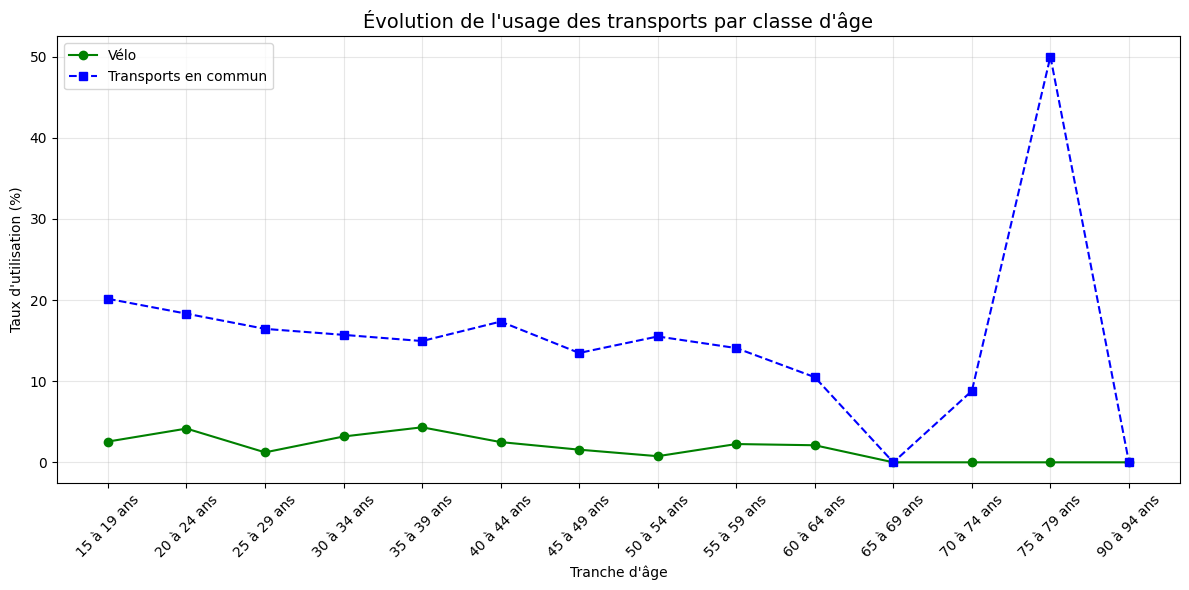

In [ ]:
# Création graphique: Courbe ébolution d'utilisation du vélo et des transports en commun par tranche d'âge

df_age = df_mobilite_commune_1001_1004.copy()

stats_age = df_age.groupby('AGEREVQ').agg(
    total=('IPONDI', 'sum'),
    velo=('utilisation_velo', 'sum'),
    transport_commun=('utilisation_transport_commun', 'sum')
).reset_index()

stats_age['pourcentage_velo'] = (stats_age['velo'] / stats_age['total']) * 100
stats_age['pourcentage_transport_commun'] = (stats_age['transport_commun'] / stats_age['total']) * 100

plt.figure(figsize=(12, 6))

plt.plot(stats_age['AGEREVQ'], stats_age['pourcentage_velo'], marker='o', linestyle='-', color='green', label='Vélo')
plt.plot(stats_age['AGEREVQ'], stats_age['pourcentage_transport_commun'], marker='s', linestyle='--', color='blue', label='Transports en commun')

plt.title('Évolution de l\'usage des transports par classe d\'âge', fontsize=14)
plt.xlabel('Tranche d\'âge')
plt.ylabel('Taux d\'utilisation (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
